### **Name : Lilian steven** ###

### **Gmail : liliansteven420@gmail.com** ###

## (1) Data Preprocessing ## 

## 1.1 importing important libraries   ##

In [1]:
# libraries
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

### 1.2 Importing the Dataset ###


In [2]:
df = pd.read_csv(r"C:\Users\Laptop\Downloads\ASS 4\data\BIKE DETAILS.csv")
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [3]:
total_rows, total_col = df.shape
print('Data:', total_rows)
print('Features:', total_col)

Data: 1061
Features: 7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


### 1.3 Data Understanding ###

In [5]:
numeric_features = df.select_dtypes(include=np.number)
numeric_features.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [6]:
categorical_features = df.select_dtypes(include=object)
categorical_features.describe()

,name,seller_type,owner
count,1061,1061,1061
unique,279,2,4
top,Bajaj Pulsar 150,Individual,1st owner
freq,41,1055,924


### 1.4 Data Correlation ###

### 1.4.1 Create the heatmap ### 
I will use a heatmap to see the correlation between each column with other columns.

### 1.4.1.1 Create the Matplotlib figure and define the plot ###

I create an empty Matplotlib plot and define the figure size. I also add the title to the plot and set the title’s font size, and its distance from the plot using the set_position method.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

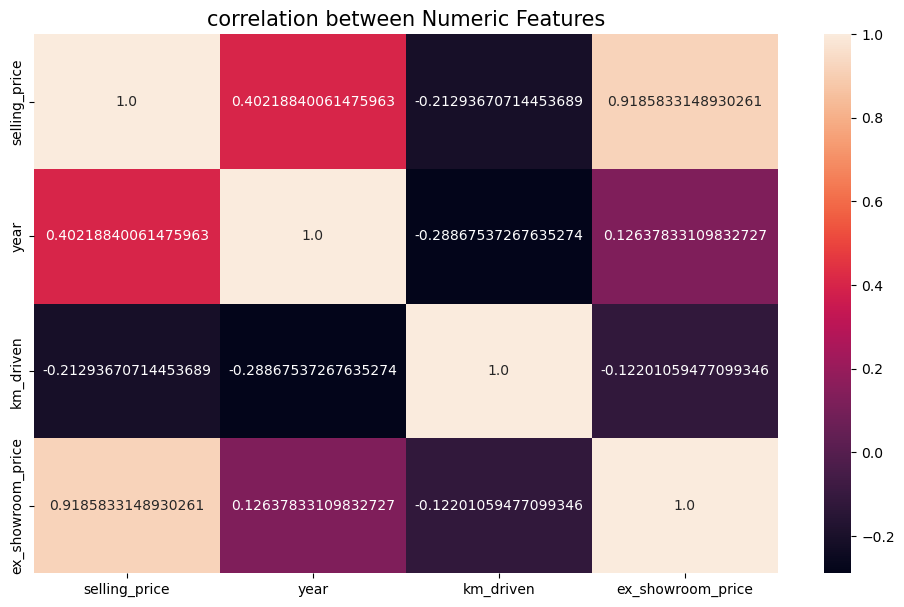

In [7]:
# Define the plot
fig , ax = plt.subplots(figsize = (12 , 7 ))

# Add title to the Heat map
title = "correlation between Numeric Features"

# Set the font size and the distance of the title from the plot
plt.title(title , fontsize = 15 )
ttl = ax.title
ttl.set_position([0.5,1.05])


# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])

# Remove the axes
#ax.axis('off')

# Use the heatmap function from the seaborn package
sns.heatmap(numeric_features.corr() , 
            annot=True ,fmt="",
            xticklabels= numeric_features.columns,
            yticklabels= numeric_features.columns ,
            ax=ax)

# Display the Pharma Sector Heatmap
plt.show()


From te heatmap, it can be seen that the `selling_price` attribute has 3 different correlation, such as:

- `ex_showroom_price`: 0.92 (strong positive correlation)
- `km_driven`: -0.21 (weak negative correlation)
- `year`: -0. (weak positive correlation)
Based on the results, it is found that selling_price has a strong positive correlation with the ex_showroom_price attribute. However it produces a negative correlation with the km_driven attribute

- Next, i try to compare more clearly between the `selling_price` attribute and the `ex_showroom_price` attribute because according to the heatmap result, every increase in `ex_showroom_price` attribute will effect the increase in the other variable which is `selling_price` attribute (positive correlation). So that it significanly forms a direction to the top right

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

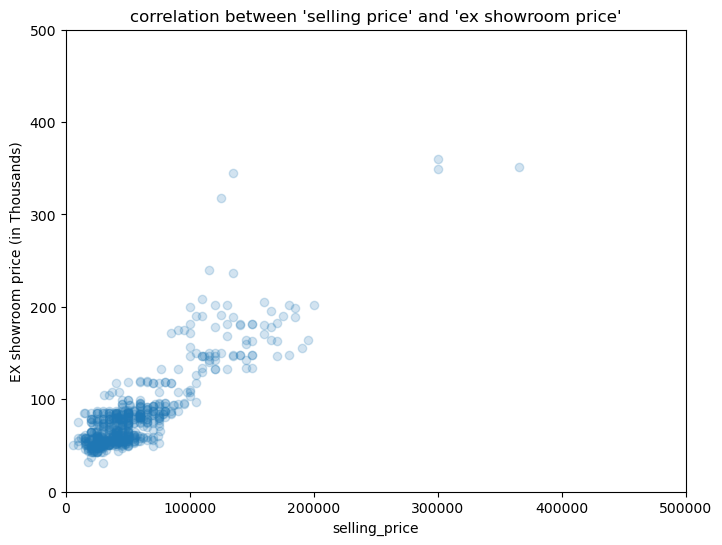

In [8]:
plt.figure(figsize=(8, 6))

plt.scatter(df["selling_price"],
            df["ex_showroom_price"],
            alpha=0.2,
            cmap='viridis')
plt.title("correlation between 'selling price' and 'ex showroom price'")
plt.xlabel("selling_price")
plt.ylabel("EX showroom price (in Thousands)");

plt.xlim(xmin = 0 , xmax =   500000)
plt.ylim(ymin = 0 , ymax =   500000)

labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype(int))
plt.show()

- Next, i try to compare more clearly between the `selling_price` attribute and the `km_driven` attribute because according to the heatmap result, every increase in `km_driven` attribute will effect the decrease in the other variable which is `selling_price` attribute (negative correlation). These two attributes have a weak negative which means that these two attributes are not very correlated so they don't actually form a significant pattern.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

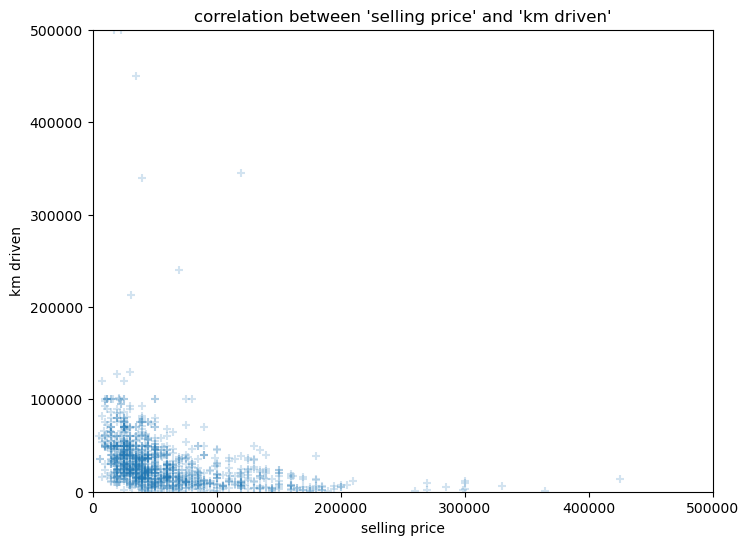

In [9]:
plt.figure(figsize=(8, 6))

plt.scatter(
    df["selling_price"],
    df["km_driven"],
    alpha=0.2,
    marker='+'
)

plt.title("correlation between 'selling price' and 'km driven'")
plt.xlabel("selling price")
plt.ylabel("km driven");

plt.xlim(xmin = 0 , xmax =   500000)
plt.ylim(ymin = 0 , ymax =   500000)
plt.show()

### 1.5 Data Visualization ###

<IPython.core.display.Javascript object>

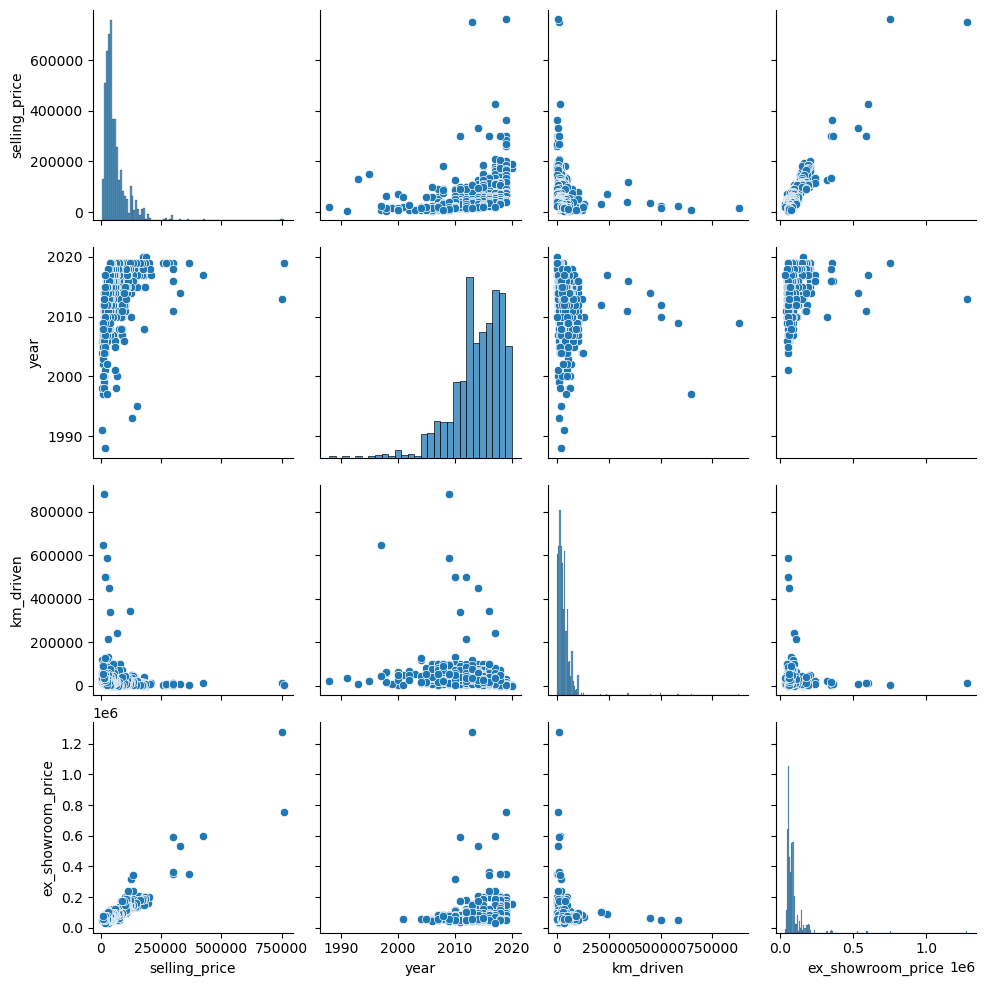

In [10]:
# Checking the distribution and correlation of each data
sns.pairplot(df);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

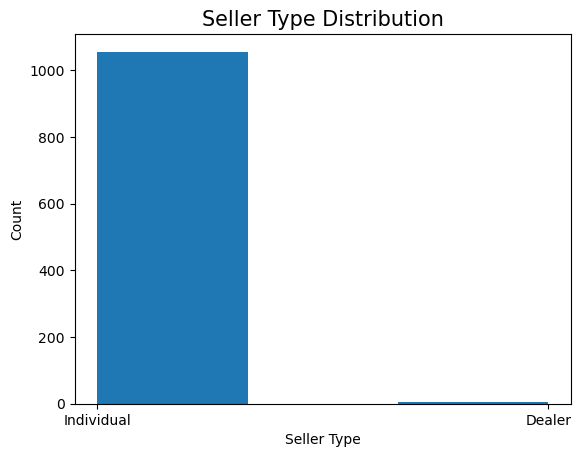

In [11]:
plt.figure()
plt.hist(df['seller_type'], bins=3)
plt.title('Seller Type Distribution', fontsize= 15)
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.ylim()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

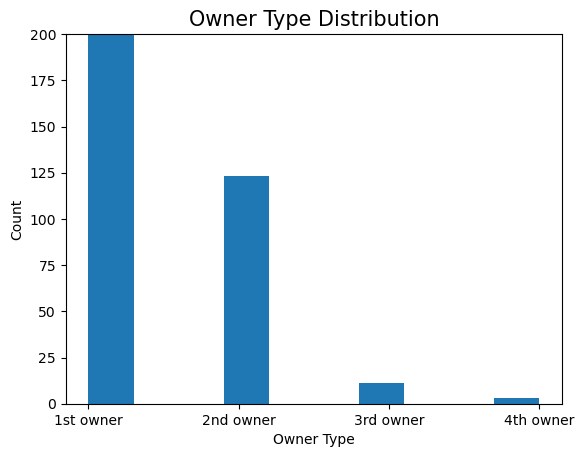

In [12]:
plt.figure()
plt.hist(df['owner'])
plt.title('Owner Type Distribution', fontsize= 15)
plt.xlabel('Owner Type')
plt.ylabel('Count')
plt.ylim(ymax=200)
plt.show()

### 1.6 Data Preprocessing ###

In [13]:
df.shape
print('Data:', df.shape[0])
print('Features:', df.shape[1])

Data: 1061
Features: 7


### 1.7 Handling Redundancy ###

In [14]:
print('Duplicates : ', df.duplicated().sum())

Duplicates :  6


### 1.8 Remove the duplicate data ###

In [15]:
df.drop_duplicates(inplace= True)
print(f"Duplicates : {df.duplicated().sum()}")
print(f"number of rows : {df.shape[0]}")

Duplicates : 0
number of rows : 1055


### 1.9 Handling Missing Value ###

In [16]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    433
dtype: int64

In [17]:
df["ex_showroom_price"].fillna(df["ex_showroom_price"].mean() , inplace= True)
print('Missing values :', df["ex_showroom_price"].isnull().sum())

Missing values : 0


### 1.10 Handling oultiers using Capping & Inter-Quartile Range (IQR) ###


<IPython.core.display.Javascript object>

selling_price boxplot :


<IPython.core.display.Javascript object>

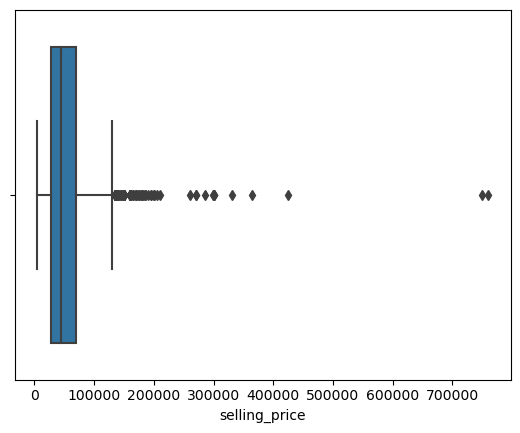

<IPython.core.display.Javascript object>

year boxplot :


<IPython.core.display.Javascript object>

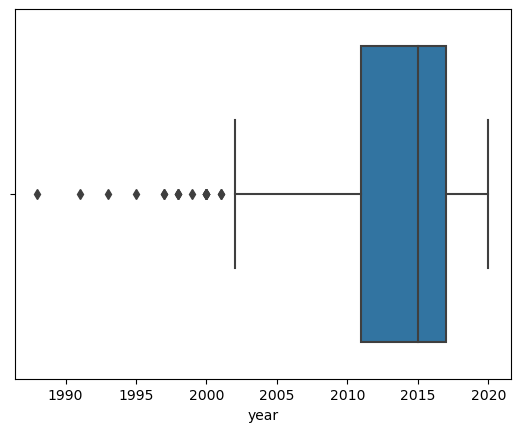

<IPython.core.display.Javascript object>

km_driven boxplot :


<IPython.core.display.Javascript object>

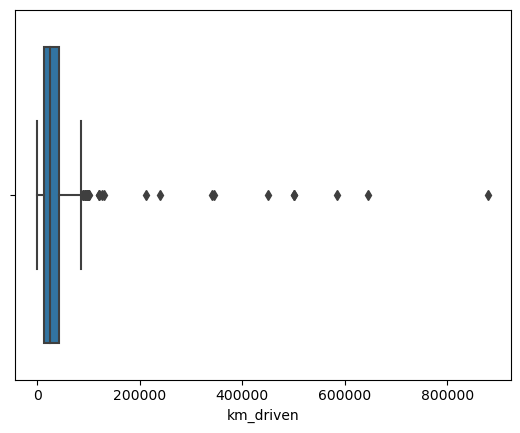

<IPython.core.display.Javascript object>

ex_showroom_price boxplot :


<IPython.core.display.Javascript object>

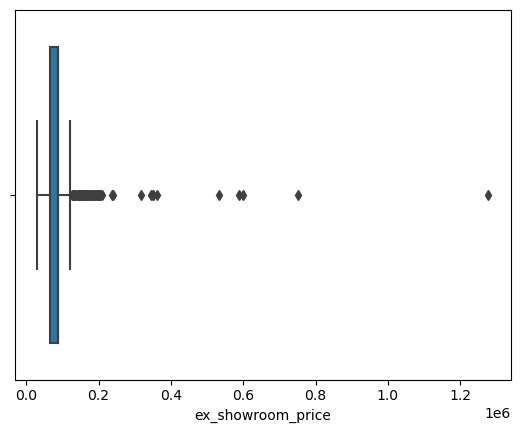

In [18]:
for col in df.columns:
    if df[col].dtype != 'object':
        bp = sns.boxplot( data = df, x = col)
        print(f"{col} boxplot :")
        plt.show()

In [19]:
def Outliers(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1 
    upper_range = q3 + (1.5 * IQR)
    lower_range = q1 - (1.5 * IQR)
    count_outlier = 0 
    for i in df[column] : 
        if i < lower_range or i > upper_range :
            count_outlier += 1 
    return count_outlier 
for col in numeric_features :
    print(f"number of Outliers in {col} : {Outliers(col)}\n" )

number of Outliers in selling_price : 87

number of Outliers in year : 18

number of Outliers in km_driven : 38

number of Outliers in ex_showroom_price : 83



 > #### From the plotting above we see that all numeric columns had outliers ####

In [20]:
def get_ranges(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1 
    upper_range = q3 + (1.5 * IQR)
    lower_range = q1 - (1.5 * IQR)
    return lower_range , upper_range

### 1.10.1 Handling Outliers in selling_price column ###

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

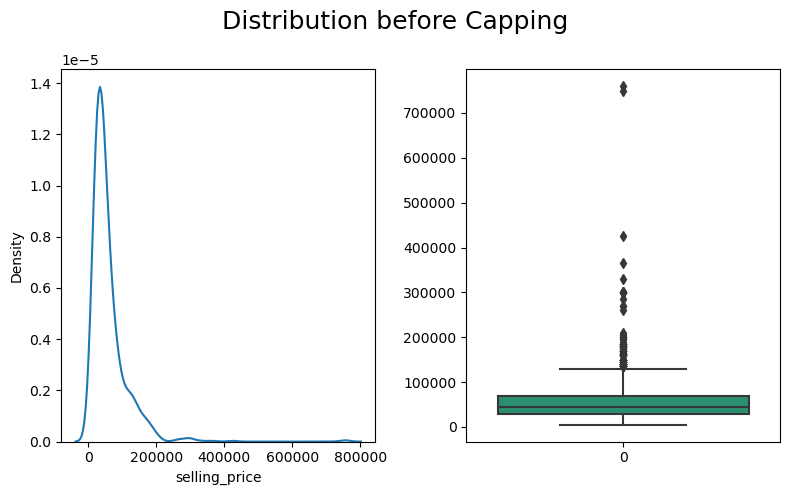

In [21]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df["selling_price"], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df["selling_price"], palette="Dark2")
plt.tight_layout()
plt.show()

In [22]:
lower_range , upper_range = get_ranges("selling_price")
print(f"lower limit : {lower_range}")
print(f"lower limit : {upper_range}")

lower limit : -35000.0
lower limit : 133000.0


In [23]:
tips_outliers = np.where(df["selling_price"] > upper_range, True,
                np.where(df["selling_price"] < lower_range, True, False))
print(tips_outliers.shape)
tips_outliers

(1055,)


array([ True, False,  True, ..., False, False, False])

In [24]:
df = df.loc[~tips_outliers]
df.shape

(968, 7)

In [25]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1,Honda Dio,45000,2017,Individual,1st owner,5650,88060.794212
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.000000
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,88060.794212
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.000000
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.000000
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.000000
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.000000
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.000000
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.000000


In [26]:
row_label = pd.Series(range(968))
df.index = row_label
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Honda Dio,45000,2017,Individual,1st owner,5650,88060.794212
1,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.000000
2,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,88060.794212
3,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.000000
4,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.000000
...,...,...,...,...,...,...,...
963,Activa 3g,17000,2010,Individual,1st owner,500000,52000.000000
964,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.000000
965,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.000000
966,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

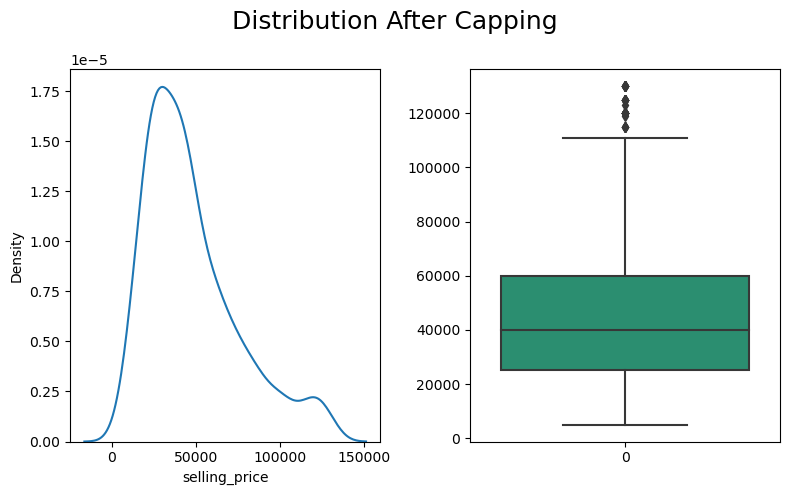

In [27]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution After Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df["selling_price"], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df["selling_price"], palette="Dark2")
plt.tight_layout()
plt.show()

### 1.10.2  Handling Outliers in year column ###

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

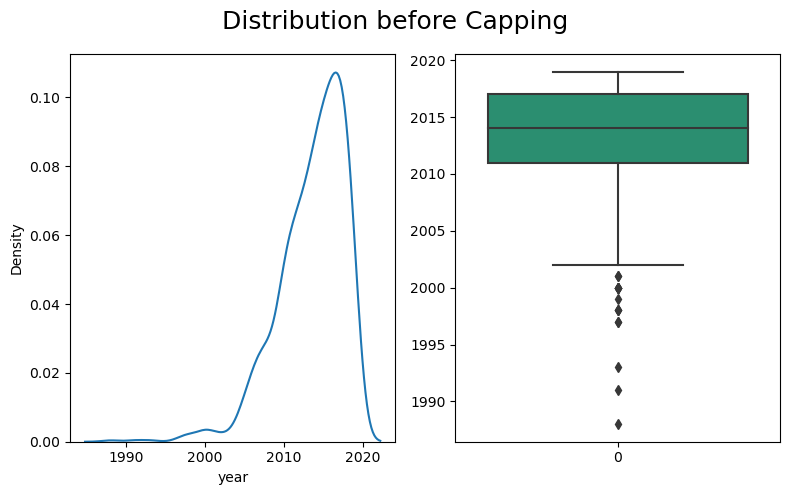

In [28]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df["year"], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df["year"], palette="Dark2")
plt.tight_layout()
plt.show()

In [29]:
lower_range_for_year , upper_range_for_year = get_ranges("year")
print(f"lower limit : {lower_range_for_year}")
print(f"lower limit : {upper_range_for_year}")

lower limit : 2002.0
lower limit : 2026.0


In [30]:
tips_outliers_for_year = np.where(df["year"] > upper_range_for_year , True ,
                         np.where(df["year"] < lower_range_for_year , True ,False))
print(tips_outliers_for_year.shape)
tips_outliers_for_year                               

(968,)


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [31]:
df = df[~tips_outliers_for_year]
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Honda Dio,45000,2017,Individual,1st owner,5650,88060.794212
1,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.000000
2,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,88060.794212
3,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.000000
4,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.000000
...,...,...,...,...,...,...,...
963,Activa 3g,17000,2010,Individual,1st owner,500000,52000.000000
964,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.000000
965,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.000000
966,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.000000


In [32]:
row_label = pd.Series(range(951))
df.index = row_label
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Honda Dio,45000,2017,Individual,1st owner,5650,88060.794212
1,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.000000
2,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,88060.794212
3,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.000000
4,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.000000
...,...,...,...,...,...,...,...
946,Activa 3g,17000,2010,Individual,1st owner,500000,52000.000000
947,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.000000
948,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.000000
949,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

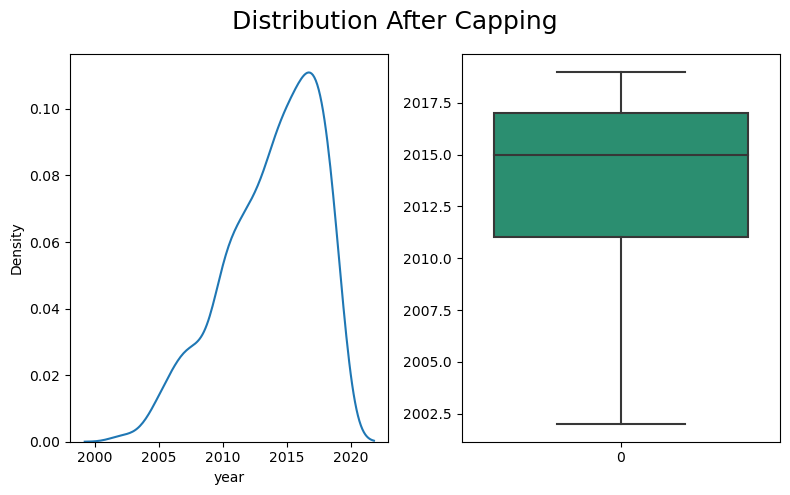

In [33]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution After Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df["year"], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df["year"], palette="Dark2")
plt.tight_layout()
plt.show()

### 1.10.2  Handling Outliers in km_driven column ###

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

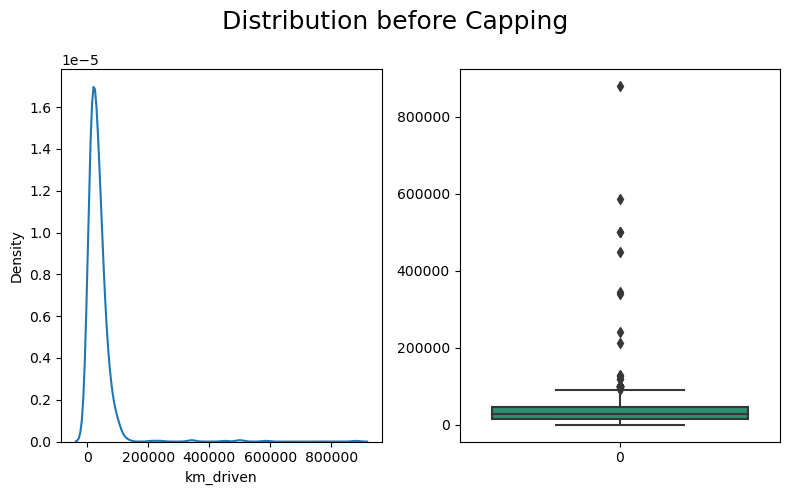

In [34]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df["km_driven"], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df["km_driven"], palette="Dark2")
plt.tight_layout()
plt.show()

In [35]:
lower_range_for_km_driven, upper_range_for_km_driven = get_ranges("km_driven")
print(f"lower limit : {lower_range_for_km_driven}")
print(f"upper limit : {upper_range_for_km_driven}")

lower limit : -30000.0
upper limit : 90000.0


In [36]:
tips_outliers_for_km_driven= np.where(df["km_driven"] > upper_range_for_km_driven , True ,
                         np.where(df["km_driven"] < lower_range_for_km_driven , True ,False))
print(tips_outliers_for_km_driven.shape)
tips_outliers_for_km_driven                               

(951,)


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [37]:
df = df[~tips_outliers_for_km_driven]
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Honda Dio,45000,2017,Individual,1st owner,5650,88060.794212
1,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.000000
2,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,88060.794212
3,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.000000
4,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.000000
...,...,...,...,...,...,...,...
944,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.000000
945,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.000000
947,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.000000
948,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

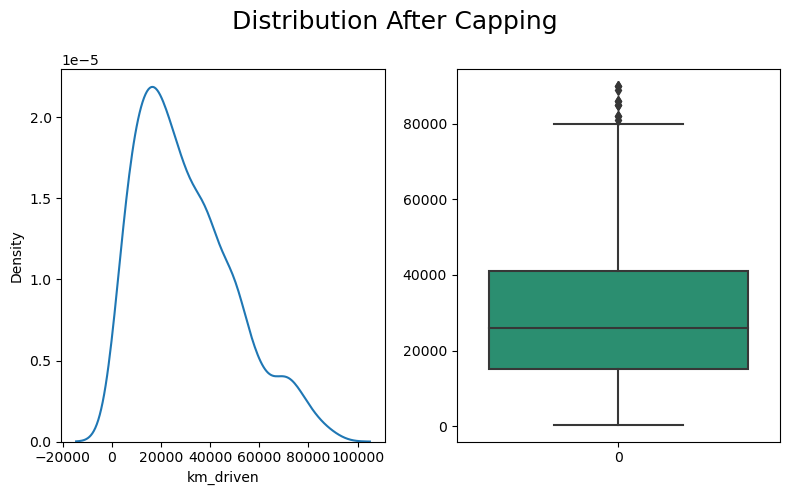

In [38]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution After Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df["km_driven"], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df["km_driven"], palette="Dark2")
plt.tight_layout()
plt.show()

### 1.10.2  Handling Outliers in ex_showroom_price column ###

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

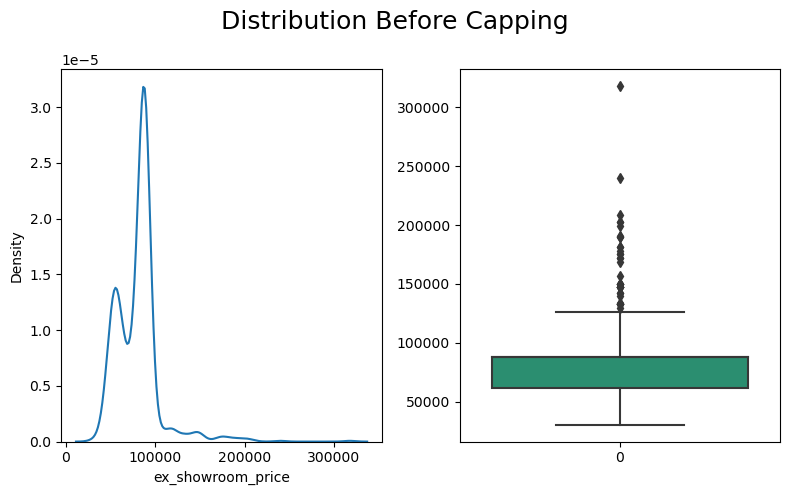

In [39]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution Before Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df["ex_showroom_price"], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df["ex_showroom_price"], palette="Dark2")
plt.tight_layout()
plt.show()

In [40]:
lower_range_for_ex_showroom_price, upper_range_for_ex_showroom_price = get_ranges("ex_showroom_price")
print(f"lower limit : {lower_range_for_ex_showroom_price}")
print(f"upper limit : {upper_range_for_ex_showroom_price}")

lower limit : 21771.308681672024
upper limit : 127834.48553054663


In [41]:
tips_outliers_for_ex_showroom_price =  np.where(df["km_driven"] > upper_range_for_ex_showroom_price , True ,
                         np.where(df["km_driven"] < lower_range_for_ex_showroom_price , True ,False))
print(tips_outliers_for_ex_showroom_price.shape)
tips_outliers_for_ex_showroom_price   

(917,)


array([ True, False,  True, False,  True, False, False, False,  True,
        True, False, False, False, False, False,  True,  True,  True,
       False,  True, False, False,  True,  True, False, False, False,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False, False, False,  True, False, False, False,  True,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False, False,  True, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
        True, False,  True,  True, False,  True,  True,  True, False,
       False, False,

In [42]:
df = df[~tips_outliers_for_ex_showroom_price]
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.000000
3,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.000000
5,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,88060.794212
6,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.000000
7,Yamaha FZ16,35000,2015,Individual,1st owner,32000,78712.000000
...,...,...,...,...,...,...,...
944,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.000000
945,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.000000
947,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.000000
948,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.000000


In [43]:
row_label = pd.Series(range(535))
df.index = row_label
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.000000
1,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.000000
2,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,88060.794212
3,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.000000
4,Yamaha FZ16,35000,2015,Individual,1st owner,32000,78712.000000
...,...,...,...,...,...,...,...
530,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.000000
531,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.000000
532,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.000000
533,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

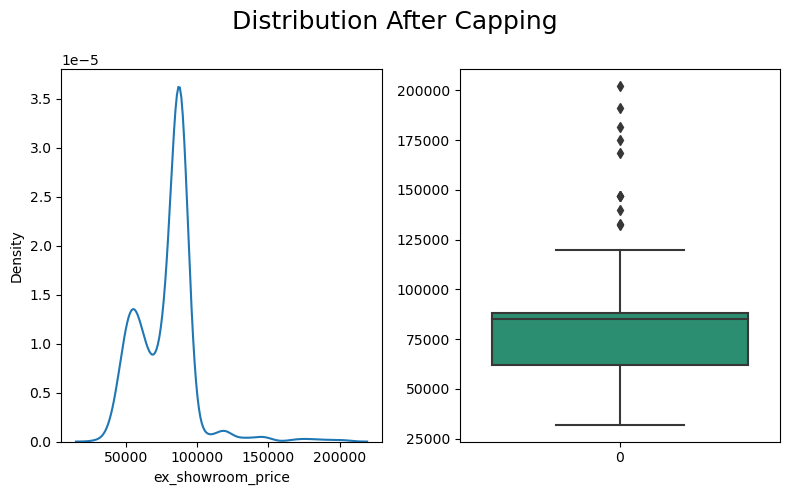

In [44]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution After Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df["ex_showroom_price"], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df["ex_showroom_price"], palette="Dark2")
plt.tight_layout()
plt.show()

### 1.11 Handling Categorical Features (Encode the label) ### 

In [45]:
df.drop(['name'], axis=1, inplace=True)


C:\Users\Laptop\AppData\Local\Temp\ipykernel_18556\574558070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['name'], axis=1, inplace=True)


In [46]:
print(df["seller_type"].unique())     
print(df["owner"].unique())

['Individual' 'Dealer']
['1st owner' '2nd owner' '3rd owner']


In [47]:
label_encoder = preprocessing.LabelEncoder()
df['owner']= label_encoder.fit_transform(df['owner'])
df['seller_type'] = label_encoder.fit_transform(df['seller_type'])

C:\Users\Laptop\AppData\Local\Temp\ipykernel_18556\3334685889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['owner']= label_encoder.fit_transform(df['owner'])
C:\Users\Laptop\AppData\Local\Temp\ipykernel_18556\3334685889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seller_type'] = label_encoder.fit_transform(df['seller_type'])


In [48]:
df

,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,65000,2015,1,0,23000,89643.000000
1,18000,2010,1,0,60000,53857.000000
2,30000,2010,1,0,32000,88060.794212
3,50000,2016,1,0,42000,60122.000000
4,35000,2015,1,0,32000,78712.000000
...,...,...,...,...,...,...
530,20000,2010,1,0,50000,78700.000000
531,18000,2017,1,0,35000,32000.000000
532,16000,2012,1,0,33000,51000.000000
533,15000,2013,1,1,35000,57000.000000


### 1.12 Finally Data Modeling : ###

In [49]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']


### 1.12.1 Train Test Split ### 

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
Linear_model = LinearRegression()
Linear_model = Linear_model.fit(X_train , y_train)


In [52]:
y_pred = Linear_model.predict(X_test)
y_pred

array([ 34166.88489744,  38144.89623065,  54035.55729156,  48321.3562293 ,
        24143.85533641,  60360.26000323,  25997.15170628,  49145.22559317,
       111810.55473298,  30451.07932514,  46880.49859826,  30786.27336533,
        79909.73410917,  48379.08106192,  65080.16572736,  62437.07911702,
        25489.54125768,  30751.9125089 ,  54356.91549403,  41474.67267711,
        26231.83013685,  76478.73057787,  52475.82626614,  25373.52556606,
        38474.49160376,  38139.6653633 ,  63244.63116379,  42641.572979  ,
        61675.08173457,  18782.08080127,  52798.13390744,  57053.98315592,
        73297.4107064 ,  39500.56296982,  62652.97837538,   5340.4414801 ,
        38541.61477097,  25472.76776959,  55857.0060307 ,  27515.11427954,
        25392.53532269,  23179.25707576,  33389.58867687,  57413.08101179,
        39814.30508936,  19541.00331845,  28362.33496092,  21411.73202718,
        59082.79494973,  30533.93888291,  50553.14333936,  59770.08827845,
        38595.50818267,  

In [53]:
Accuracy = Linear_model.score( X_test, y_test)*100 
Accuracy

57.11170433195334

In [54]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  

Mean Absolute Error: 9702.044142054176
Mean Squared Error: 217713453.35070315
